In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

KeyboardInterrupt: 

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [25]:
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.strftime('%B')
df_DA_explode = df_DA.explode('job_skills')
df_DA_explode = df_DA_explode.drop(columns='job_posted_month_no')


In [26]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)


Creating a new index to show the total for all the column

In [ ]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
# df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
December,6058,4376,4196,3139,2857,2125,1858,822,786,753,...,0,0,0,0,1,0,0,0,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0


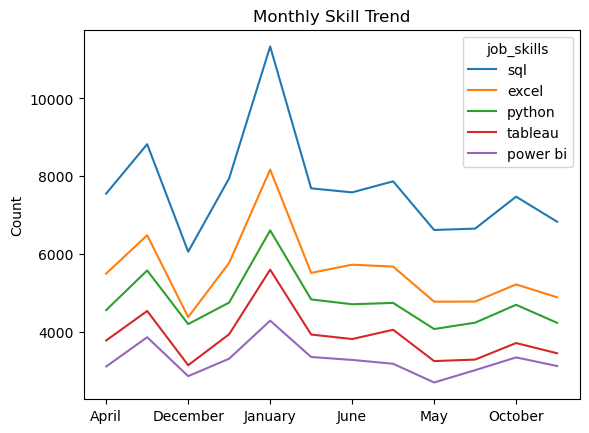

In [30]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Monthly Skill Trend')
plt.xlabel('')
plt.ylabel('Count')
plt.show()